In [1]:
import pandas, seaborn

# 0. user-defined variables

In [2]:
expression_file = '/home/adrian/projects/vigur/results/transcriptomics/deseq2/DESeq2_TPM_values.tsv'
metadata_file = '/home/adrian/projects/vigur/data/transcriptomics/metadata/vigur_metadata_experiment3.tsv'

In [3]:
receptors = {}
receptors['DIO2'] = 'ENSG00000211448'

# 1. read data

In [4]:
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)

In [5]:
print(expression.shape)
expression.head()

(61881, 25)


,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,RSS_HLMV_37,RSS_HLMV_38,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSG00000000003,38.526890,35.309339,39.840736,41.951376,38.061629,38.565773,38.346359,43.985521,43.715238,32.005577,...,35.204046,36.511499,29.939159,31.072017,40.662226,36.395800,24.905552,35.040346,30.920235,37.974110
ENSG00000000005,0.000000,0.000000,0.000000,0.278312,0.000000,0.000000,0.000000,0.000000,0.458944,0.075399,...,0.000000,0.000000,0.177716,0.059379,0.000000,0.000000,0.000000,0.116122,0.015197,0.000000
ENSG00000000419,69.415227,49.131680,66.184838,92.956950,88.650591,85.447069,127.356106,157.183636,150.956365,118.875515,...,113.265541,106.959497,99.429725,85.549739,102.582479,100.516519,84.135830,95.060423,96.772840,107.100754
ENSG00000000457,3.331287,2.858376,3.504064,5.829721,5.274378,4.404222,3.822031,5.466647,6.620200,4.851150,...,3.444193,3.965564,3.876106,3.360422,4.843100,4.291843,2.957526,4.852541,3.489343,3.486497
ENSG00000000460,2.744336,3.172060,3.679316,4.587781,3.403177,3.809046,3.916106,4.543919,3.736573,2.749359,...,3.024118,3.693697,2.545423,2.743481,3.342448,3.326444,3.072015,3.377629,2.217106,3.247478


In [6]:
metadata = pandas.read_csv(metadata_file, sep='\t')

In [7]:
print(metadata.shape)
metadata

(27, 4)


,sample,time,treatment,replicate
0,RSS_HLMV_28,zero,zero,A
1,RSS_HLMV_29,zero,zero,B
2,RSS_HLMV_30,zero,zero,C
3,RSS_HLMV_31,four,zero,A
4,RSS_HLMV_32,four,zero,B
5,RSS_HLMV_33,four,zero,C
6,RSS_HLMV_34,four,half,A
7,NaN,NaN,NaN,NaN
8,RSS_HLMV_36,four,half,C
9,RSS_HLMV_37,four,five,A


# 2. analysis

## 2.1. face-value expression 

In [8]:
ensembl_IDs = [receptors[element] for element in receptors]
ensembl_IDs

gene_IDs = [element for element in receptors]
gene_IDs

reverse_names = {}
for i in range(len(ensembl_IDs)):
    reverse_names[ensembl_IDs[i]] = gene_IDs[i]
print(reverse_names)

{'ENSG00000211448': 'DIO2'}


In [9]:
RE = expression.loc[ensembl_IDs, ]
print(RE.shape)
RE.head()

(1, 25)


,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,RSS_HLMV_37,RSS_HLMV_38,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSG00000211448,1.177947,0.459658,0.839254,3.006277,1.153057,1.69466,46.359516,67.717599,74.965854,45.334018,...,0.894882,11.180774,8.200936,8.132465,7.938604,14.935663,5.368193,11.999244,5.947345,6.30973


In [10]:
# calculate averages

In [11]:
sub_samples = metadata[metadata['time'] == 'zero']['sample']
print(sub_samples)
average = RE[sub_samples].mean(axis=1)
average.head()

TPM = pandas.DataFrame(average)
TPM.rename(columns={0:'T0_zero'}, inplace=True)
TPM.head()

0    RSS_HLMV_28
1    RSS_HLMV_29
2    RSS_HLMV_30
Name: sample, dtype: object


,T0_zero
ENSG00000211448,0.82562


In [12]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'zero')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_zero'] = average
TPM.head()

        sample  time treatment replicate
3  RSS_HLMV_31  four      zero         A
4  RSS_HLMV_32  four      zero         B
5  RSS_HLMV_33  four      zero         C


,T0_zero,T4_zero
ENSG00000211448,0.82562,1.951331


In [13]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'half')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_half'] = average
TPM.head()

        sample  time treatment replicate
6  RSS_HLMV_34  four      half         A
8  RSS_HLMV_36  four      half         C


,T0_zero,T4_zero,T4_half
ENSG00000211448,0.82562,1.951331,57.038558


In [14]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'five')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_five'] = average
TPM.head()

         sample  time treatment replicate
9   RSS_HLMV_37  four      five         A
10  RSS_HLMV_38  four      five         B
11  RSS_HLMV_39  four      five         C


,T0_zero,T4_zero,T4_half,T4_five
ENSG00000211448,0.82562,1.951331,57.038558,66.121056


In [15]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'fifty')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_fifty'] = average
TPM.head()

         sample  time treatment replicate
13  RSS_HLMV_41  four     fifty         B
14  RSS_HLMV_42  four     fifty         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty
ENSG00000211448,0.82562,1.951331,57.038558,66.121056,36.061429


In [16]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'zero')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_zero'] = average
TPM.head()

         sample        time treatment replicate
15  RSS_HLMV_43  twentyfour      zero         A
16  RSS_HLMV_44  twentyfour      zero         B
17  RSS_HLMV_45  twentyfour      zero         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero
ENSG00000211448,0.82562,1.951331,57.038558,66.121056,36.061429,1.034035


In [17]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'half')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_half'] = average
TPM.head()

         sample        time treatment replicate
18  RSS_HLMV_46  twentyfour      half         A
19  RSS_HLMV_47  twentyfour      half         B
20  RSS_HLMV_48  twentyfour      half         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half
ENSG00000211448,0.82562,1.951331,57.038558,66.121056,36.061429,1.034035,9.171392


In [18]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'five')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_five'] = average
TPM.head()

         sample        time treatment replicate
21  RSS_HLMV_49  twentyfour      five         A
22  RSS_HLMV_50  twentyfour      five         B
23  RSS_HLMV_51  twentyfour      five         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half,T24_five
ENSG00000211448,0.82562,1.951331,57.038558,66.121056,36.061429,1.034035,9.171392,9.414154


In [19]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'fifty')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_fifty'] = average
TPM.head()

         sample        time treatment replicate
24  RSS_HLMV_52  twentyfour     fifty         A
25  RSS_HLMV_53  twentyfour     fifty         B
26  RSS_HLMV_54  twentyfour     fifty         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half,T24_five,T24_fifty
ENSG00000211448,0.82562,1.951331,57.038558,66.121056,36.061429,1.034035,9.171392,9.414154,8.08544


In [20]:
# 3. generate figure

In [21]:
TPM.rename(reverse_names, axis='index', inplace=True)
TPM

,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half,T24_five,T24_fifty
DIO2,0.82562,1.951331,57.038558,66.121056,36.061429,1.034035,9.171392,9.414154,8.08544


<Axes: >

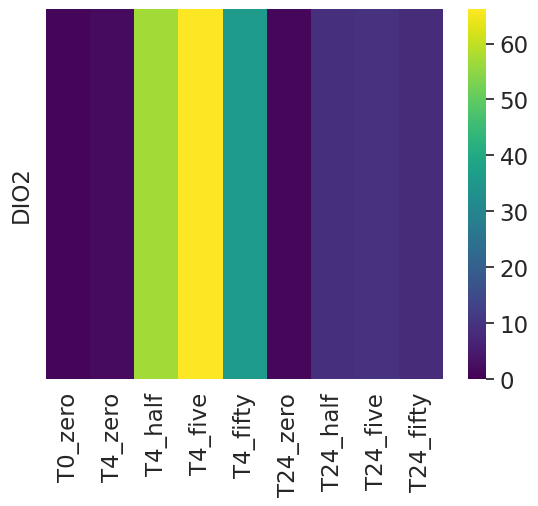

In [22]:
seaborn.set(font_scale=1.5)

seaborn.heatmap(TPM, cmap='viridis', vmin=0)

In [23]:
# calculate fc for appropriate genes
import matplotlib

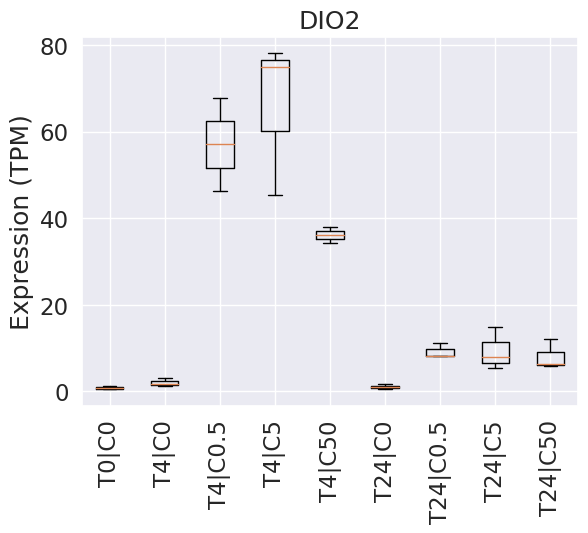

In [24]:
for ensembl in ensembl_IDs:
    
    traj = []
    
    sub_samples = metadata[(metadata['time'] == 'zero') & (metadata['treatment'] == 'zero')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'zero')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'half')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'five')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'fifty')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    

    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'zero')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'half')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'five')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'fifty')]
    values = RE.loc[ensembl, sub_samples['sample']].to_list()
    traj.append(values)
    
    
    matplotlib.pyplot.boxplot(traj)
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['T0|C0', 'T4|C0', 'T4|C0.5', 'T4|C5', 'T4|C50', 'T24|C0', 'T24|C0.5', 'T24|C5', 'T24|C50'], rotation=90)
    matplotlib.pyplot.ylabel('Expression (TPM)')
    matplotlib.pyplot.title(reverse_names[ensembl])
    matplotlib.pyplot.show()